In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# from plotData import *
# import costFunction as cf
# import plotDecisionBoundary as pdb
# import predict as predict
# from sigmoid import *

In [7]:
# Load csv file without column name
df = pd.read_csv('./ex2data1.txt', names=['exam-1', 'exam-2', 'label'])

In [8]:
X = df.loc[:, ['exam-1', 'exam-2']]
y = df.loc[:, 'label']

# row number and column number
m, n = df.iloc[:, :-1].shape

# dataframe to numpy matrix 
X = df.loc[:, ['exam-1', 'exam-2']]
# add theta-0 column
X = np.c_[np.ones(m), X.values]

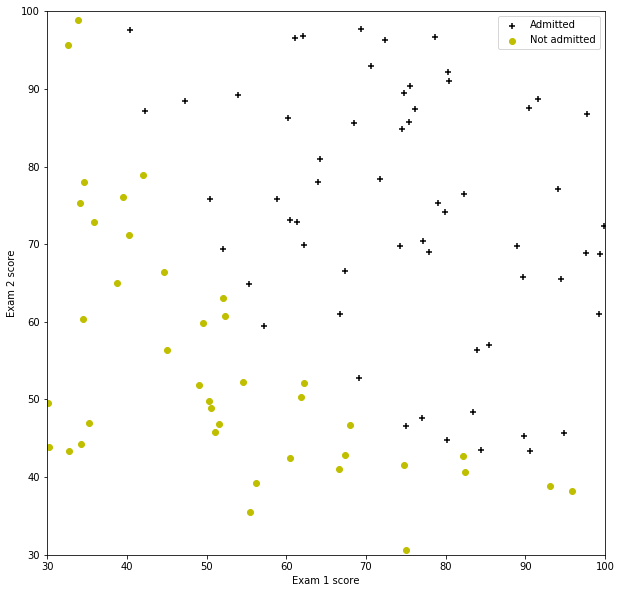

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(
    df.loc[df.label == 1, ['exam-1']],
    df.loc[df.label == 1, ['exam-2']],
    marker='+',
    color='black',
    label='Admitted'
)

plt.scatter(
    df.loc[df.label == 0, ['exam-1']],
    df.loc[df.label == 0, ['exam-2']],
    marker='o',
    color='y',
    label='Not admitted'
)


plt.xlim([30, 100])
plt.ylim([30, 100])

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

In [10]:
# sigmoid function
sigmoid_func = lambda x: 1 / (1 + np.exp(-x))
# sigmoid_func = lambda x: np.exp(x) / (np.exp(x)+1)

Text(0.5, 1.0, 'sigmoid function')

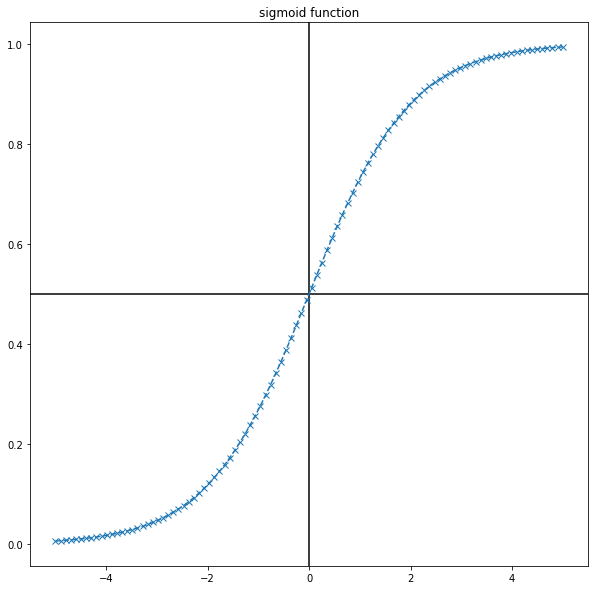

In [12]:
plt.figure(figsize=(10, 10))
test_sigmoid_x = np.linspace(-5, 5, 100)
test_sigmoid_y = sigmoid_func(test_sigmoid_x)

plt.axvline(x=0, color='black')
plt.axhline(y=0.5, color='black')
plt.plot(test_sigmoid_x, test_sigmoid_y, 'x--')
plt.title('sigmoid function')

In [13]:
# hypothesis function 
h_func = lambda theta, X: sigmoid_func(theta @ X.transpose()) 

In [15]:
def cost_function(theta, X, y):
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #
    
    cost = (-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m 

    for idx in range(3):
        grad[idx] += ((h_func(theta, X) - y) @ X[:, idx]) / m
    # ===========================================================

    return cost, grad

In [17]:
initial_theta = np.zeros(n + 1)

cost = 0
grad = np.zeros(initial_theta.shape)

In [18]:
cost, grad = cost_function(initial_theta, X, y)

In [19]:
print('Cost at initial theta (zeros): {:0.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): \n{}'.format(grad))
print('Expected gradients (approx): \n-0.1000\n-12.0092\n-11.2628')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): 
-0.1000
-12.0092
-11.2628


In [20]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)

print('Cost at test theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta: \n{}'.format(grad))
print('Expected gradients (approx): \n0.043\n2.566\n2.647')

Cost at test theta (zeros): 0.21833019382659785
Expected cost (approx): 0.218
Gradient at test theta: 
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx): 
0.043
2.566
2.647


In [23]:
# ===================== Part 3: Optimizing using fmin_bfgs =====================
# In this exercise, you will use a built-in function (opt.fmin_bfgs) to find the
# optimal parameters theta
def cost_func(t):
    return cost_function(t, X, y)[0]


def grad_func(t):
    return cost_function(t, X, y)[1]


# Run fmin_bfgs to obtain the optimal theta
theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=initial_theta, maxiter=400, full_output=True, disp=False)

print('Cost at theta found by fmin: {:0.4f}'.format(cost))
print('Expected cost (approx): 0.203')
print('theta: \n{}'.format(theta))
print('Expected Theta (approx): \n-25.161\n0.206\n0.201')

Cost at theta found by fmin: 0.2035
Expected cost (approx): 0.203
theta: 
[-25.16133284   0.2062317    0.2014716 ]
Expected Theta (approx): 
-25.161
0.206
0.201


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


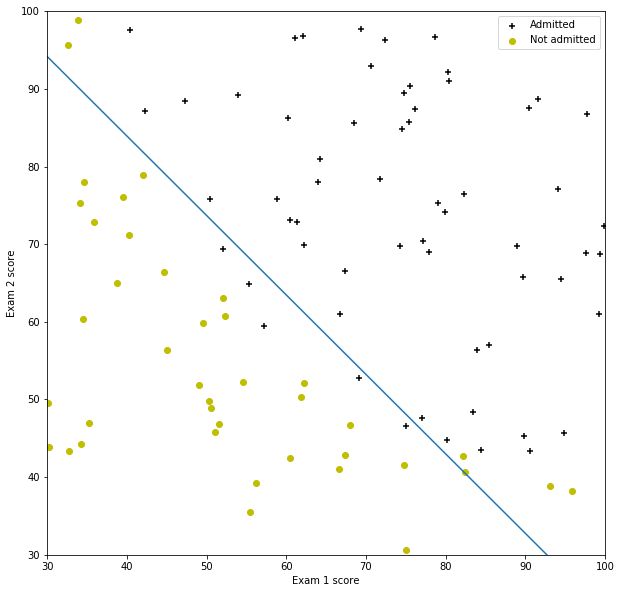

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(
    df.loc[df.label == 1, ['exam-1']],
    df.loc[df.label == 1, ['exam-2']],
    marker='+',
    color='black',
    label='Admitted'
)

plt.scatter(
    df.loc[df.label == 0, ['exam-1']],
    df.loc[df.label == 0, ['exam-2']],
    marker='o',
    color='y',
    label='Not admitted'
)

sample_x = np.linspace(30, 100, 50)
y_func = lambda theta, x: -(theta[0] + theta[1] * x) / theta[2] 
sample_y = y_func(theta, sample_x)

plt.plot(sample_x, sample_y)

plt.xlim([30, 100])
plt.ylim([30, 100])

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

In [25]:
# ===================== Part 4: Predict and Accuracies =====================
# After learning the parameters, you'll like to use it to predict the outcomes
# on unseen data. In this part, you will use the logistic regression model
# to predict the probability that a student with score 45 on exam 1 and
# score 85 on exam 2 will be admitted
#
# Furthermore, you will compute the training and test set accuracies of our model.
#
# Your task is to complete the code in predict.py

# Predict probability for a student with score 45 on exam 1
# and score 85 on exam 2

# prob = sigmoid(np.array([1, 45, 85]).dot(theta))
prob = sigmoid_func(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:0.4f}'.format(prob))
print('Expected value : 0.775 +/- 0.002')


For a student with scores 45 and 85, we predict an admission probability of 0.7763
Expected value : 0.775 +/- 0.002


In [27]:
def predict(theta, X):
    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned logistic regression parameters.
    #                You should set p to a 1D-array of 0's and 1's
    #

    p = 1 * (0.5 <= sigmoid_func(theta @ X.transpose()))
    # ===========================================================

    return p


In [28]:

# Compute the accuracy on our training set
# p = predict.predict(theta, X)
p = predict(theta, X)

print('Train accuracy: {}'.format(np.mean(y == p) * 100))
print('Expected accuracy (approx): 89.0')

print('ex2 Finished. Press ENTER to exit')


Train accuracy: 89.0
Expected accuracy (approx): 89.0
ex2 Finished. Press ENTER to exit
